In [741]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
%matplotlib inline

In [742]:
def figure_for_scatter():
    f = plt.figure(figsize=(12, 12))

In [743]:
column_names = ["sen", "rec", "ret", "cir", "top","tok","mess","rush","sil","s_m","s_n","er", "nans"]
path_to_meta = "D:\\Git\\TokenRing\\research\\results.txt"

In [744]:
data = pd.read_table(path_to_meta, sep=' ', names=column_names)
data = data.drop(data.index[0])
data = data.drop("nans", axis=1)
data["sen"].apply(pd.to_numeric, errors='coerce')
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,5741153.5,7667738.0,9975399.0,4287347.0,27,12,1000,false,true,10,10,false
2,46556624.5,49976952.5,52055030.0,5321700.0,29,12,1000,false,true,10,10,false
3,1752779.0,3700559.0,5555300.0,3802298.0,25,14,1000,false,true,10,10,false
4,2908059.5,5430133.0,7418967.0,4389533.0,27,14,1000,false,true,10,10,false
5,225344.5,977236.5,1721543.0,1421456.0,15,15,1000,false,true,10,10,false


In [745]:
cols_numeric = ["sen", "rec", "ret", "cir", "top","tok","mess","s_m","s_n"]
data[cols_numeric] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [746]:
d = {'true': True, 'false': False}

In [747]:
for col in ["rush","sil", "er"]:
    data[col] = data[col].map(d)
data.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,5741153.5,7667738.0,9975399.0,4287347.0,27.0,12.0,1000.0,False,True,10.0,10.0,False
2,46556624.5,49976952.5,52055030.0,5321700.0,29.0,12.0,1000.0,False,True,10.0,10.0,False
3,1752779.0,3700559.0,5555300.0,3802298.0,25.0,14.0,1000.0,False,True,10.0,10.0,False
4,2908059.5,5430133.0,7418967.0,4389533.0,27.0,14.0,1000.0,False,True,10.0,10.0,False
5,225344.5,977236.5,1721543.0,1421456.0,15.0,15.0,1000.0,False,True,10.0,10.0,False


## Plots

[]

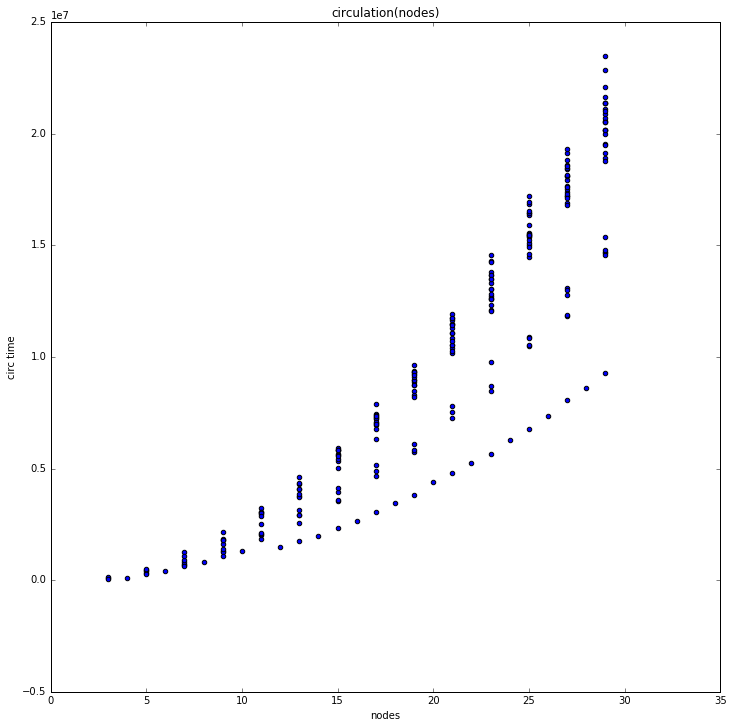

In [748]:
figure_for_scatter()
plt.title("circulation(nodes)")
plt.ylabel("circ time")
plt.xlabel("nodes")
plt.scatter(rush_noearly["top"], rush_noearly["cir"])
plt.plot()

In [749]:
data.to_csv("data_hw2.csv", index= True, sep=" ", encoding= "utf_8")

In [750]:
rush_early = data.loc[np.logical_and(data.er == 1, data.rush == 1)]
rush_early_1toc = rush_early.loc[np.logical_and(rush_early.tok == 1, True)]
rush_early_11nodes = rush_early.loc[np.logical_and(rush_early.top == 11, True)]
rush_early_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
895,2099942.5,2130286.5,2161076.0,39714.0,3.0,1.0,1000.0,True,True,10.0,10.0,True
896,4729111.0,4802962.0,4866103.0,122266.0,4.0,1.0,1000.0,True,True,10.0,10.0,True
897,7426106.5,7581393.0,7746273.5,210619.0,5.0,1.0,1000.0,True,True,10.0,10.0,True
898,48402218.0,49229968.0,49881014.0,1507800.0,10.0,1.0,1000.0,True,True,10.0,10.0,True
899,13820089.0,14152082.0,14351545.5,395134.0,6.0,1.0,1000.0,True,True,10.0,10.0,True


In [751]:
rush_noearly = data.loc[np.logical_and(data.er == 0, data.rush == 1)]
rush_noearly_1toc = rush_noearly.loc[np.logical_and(rush_noearly.tok == 1, True)]
rush_noearly_11nodes = rush_noearly.loc[np.logical_and(rush_noearly.top == 11, True)]
rush_noearly_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
869,7063993.0,7093443.5,7124456.5,57340.0,3.0,1.0,1000.0,True,True,10.0,10.0,False
870,14124416.0,14176401.0,14236865.0,104417.0,4.0,1.0,1000.0,True,True,10.0,10.0,False
871,35650172.5,35798319.5,36047091.0,257027.0,5.0,1.0,1000.0,True,True,10.0,10.0,False
872,58308899.0,58528442.0,58724558.5,392680.0,6.0,1.0,1000.0,True,True,10.0,10.0,False
873,105078819.5,105291000.5,105697290.0,640335.0,7.0,1.0,1000.0,True,True,10.0,10.0,False


In [752]:
norush_early = data.loc[np.logical_and(data.er == 1, data.rush == 0)]
norush_early_1toc = norush_early.loc[np.logical_and(norush_early.tok == 1, True)]
norush_early_11nodes = norush_early.loc[np.logical_and(norush_early.top == 11, True)]
norush_early_1toc.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
93,29451.0,48639.0,65149.0,30789.0,3.0,1.0,1000.0,False,True,10.0,10.0,True
94,95938.0,155733.0,214189.0,111333.5,5.0,1.0,1000.0,False,True,10.0,10.0,True
95,179160.0,326191.5,462291.0,265951.0,7.0,1.0,1000.0,False,True,10.0,10.0,True
96,418561.0,784467.0,1099056.0,646583.0,9.0,1.0,1000.0,False,True,10.0,10.0,True
97,849170.0,1488613.0,2127163.0,1204366.0,11.0,1.0,1000.0,False,True,10.0,10.0,True


In [753]:
norush_noearly = data.loc[np.logical_and(data.er == 0, data.rush == 0)]
norush_noearly_1toc = norush_noearly.loc[np.logical_and(norush_noearly.tok == 1, True)]
norush_noearly_11nodes = norush_noearly.loc[np.logical_and(norush_noearly.top == 11, True)]
norush_noearly.head()

,sen,rec,ret,cir,top,tok,mess,rush,sil,s_m,s_n,er
1,5741153.5,7667738.0,9975399.0,4287347.0,27.0,12.0,1000.0,False,True,10.0,10.0,False
2,46556624.5,49976952.5,52055030.0,5321700.0,29.0,12.0,1000.0,False,True,10.0,10.0,False
3,1752779.0,3700559.0,5555300.0,3802298.0,25.0,14.0,1000.0,False,True,10.0,10.0,False
4,2908059.5,5430133.0,7418967.0,4389533.0,27.0,14.0,1000.0,False,True,10.0,10.0,False
5,225344.5,977236.5,1721543.0,1421456.0,15.0,15.0,1000.0,False,True,10.0,10.0,False


## 1. Throughput(topology_size)

Рассмотрим случай одного токена, как классический

[]

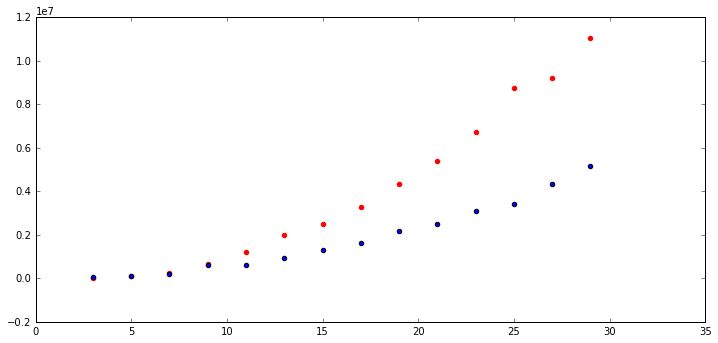

In [754]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"])
plt.plot()

[]

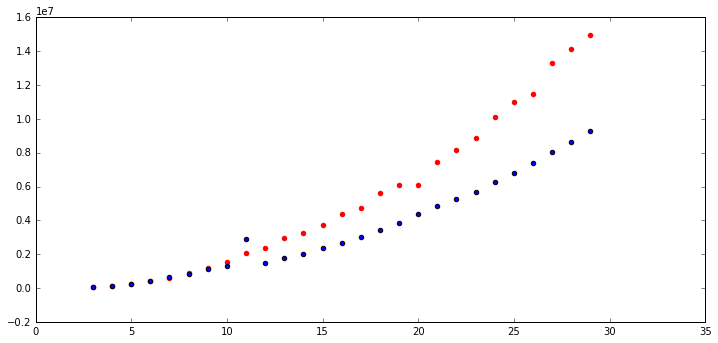

In [755]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"])
plt.plot()

[]

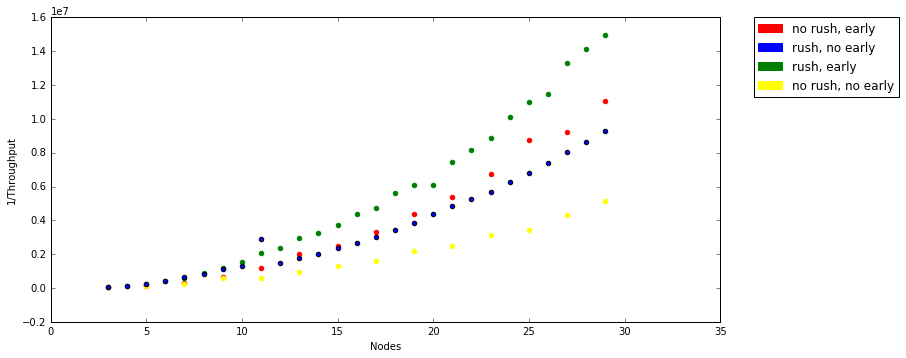

In [763]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("1/Throughput")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["cir"]/norush_early_1toc["tok"], color="red")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["cir"]/rush_early_1toc["tok"], color="green")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["cir"]/norush_noearly_1toc["tok"], color="yellow")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["cir"]/rush_noearly_1toc["tok"])

red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])


plt.plot()

## 2. Latency(topology_size)

[]

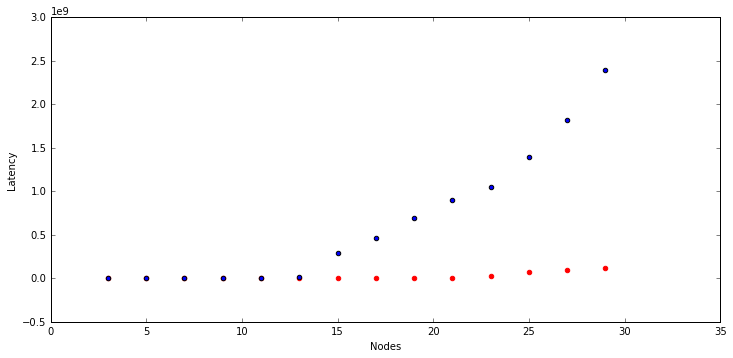

In [764]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Nodes")
plt.ylabel("Latency")
plt.scatter(norush_early_1toc["top"], norush_early_1toc["rec"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["rec"])
plt.plot()

[]

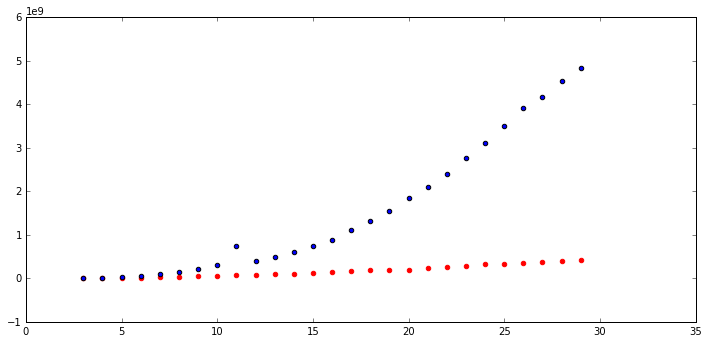

In [758]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(rush_early_1toc["top"], rush_early_1toc["rec"], color="red")
# plt.plot()
# plt.subplot(212)
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["rec"])
plt.plot()

[]

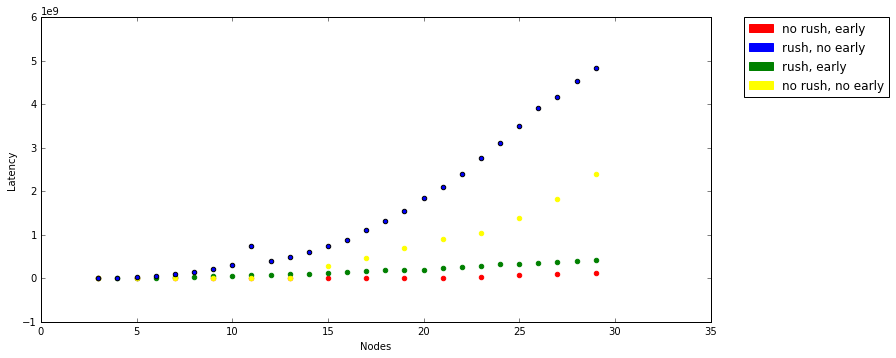

In [765]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_1toc["top"], norush_early_1toc["rec"]/norush_early_1toc["tok"], color="red")
plt.scatter(rush_early_1toc["top"], rush_early_1toc["rec"]/rush_early_1toc["tok"], color="green")
plt.scatter(norush_noearly_1toc["top"], norush_noearly_1toc["rec"]/norush_noearly_1toc["tok"], color="yellow")
plt.scatter(rush_noearly_1toc["top"], rush_noearly_1toc["rec"]/rush_noearly_1toc["tok"])
plt.xlabel("Nodes")
plt.ylabel("Latency")
red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

## 3. Throughput(tokens)

[]

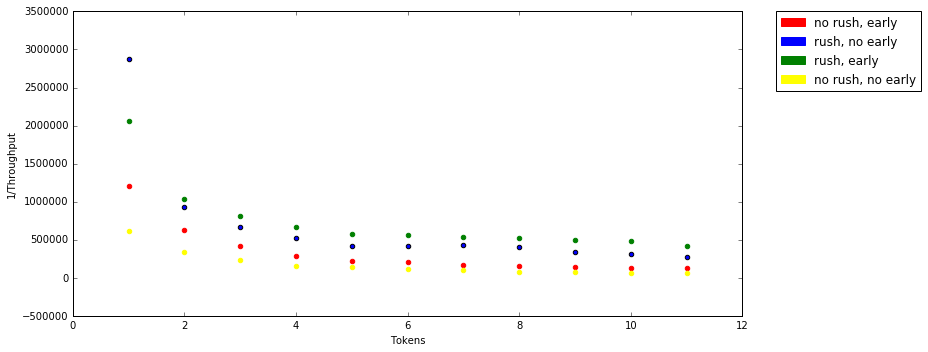

In [770]:
figure_for_scatter()
plt.subplot(211)
plt.scatter(norush_early_11nodes["tok"], norush_early_11nodes["cir"]/norush_early_11nodes["tok"], color="red")
plt.scatter(rush_early_11nodes["tok"], rush_early_11nodes["cir"]/rush_early_11nodes["tok"], color="green")
plt.scatter(norush_noearly_11nodes["tok"], norush_noearly_11nodes["cir"]/norush_noearly_11nodes["tok"], color="yellow")
plt.scatter(rush_noearly_11nodes["tok"], rush_noearly_11nodes["cir"]/rush_noearly_11nodes["tok"])
plt.xlabel("Tokens")
plt.ylabel("1/Throughput")
red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

## 4. Latency(tokens)

[]

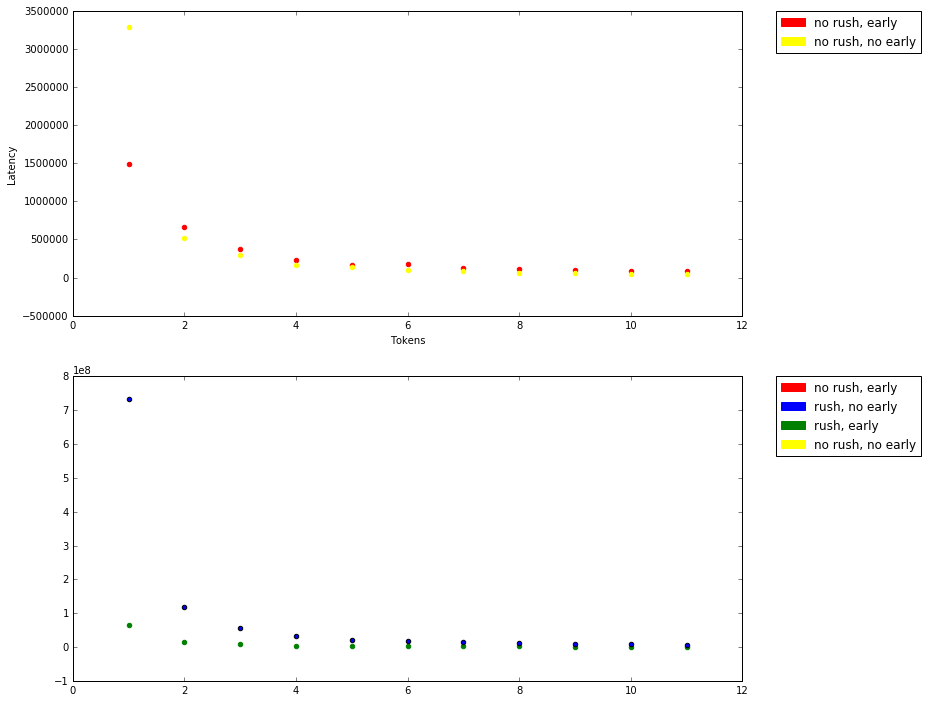

In [784]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_11nodes["tok"], norush_early_11nodes["rec"]/norush_early_11nodes["tok"], color="red")
plt.scatter(norush_noearly_11nodes["tok"], norush_noearly_11nodes["rec"]/norush_noearly_11nodes["tok"], color="yellow")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, yellow_patch])
plt.subplot(212)
plt.scatter(rush_early_11nodes["tok"], rush_early_11nodes["rec"]/rush_early_11nodes["tok"], color="green")
plt.scatter(rush_noearly_11nodes["tok"], rush_noearly_11nodes["rec"]/rush_noearly_11nodes["tok"])

red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()

[]

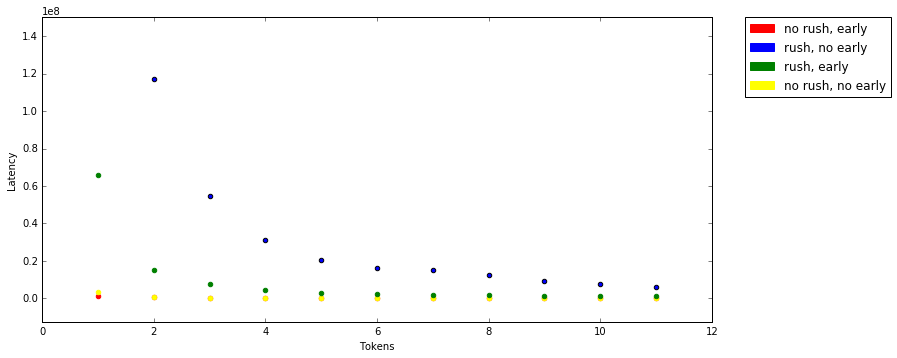

In [785]:
figure_for_scatter()
plt.subplot(211)
plt.xlabel("Tokens")
plt.ylabel("Latency")
plt.scatter(norush_early_11nodes["tok"], norush_early_11nodes["rec"]/norush_early_11nodes["tok"], color="red")
plt.scatter(norush_noearly_11nodes["tok"], norush_noearly_11nodes["rec"]/norush_noearly_11nodes["tok"], color="yellow")
plt.scatter(rush_early_11nodes["tok"], rush_early_11nodes["rec"]/rush_early_11nodes["tok"], color="green")
plt.scatter(rush_noearly_11nodes["tok"], rush_noearly_11nodes["rec"]/rush_noearly_11nodes["tok"])
plt.ylim(ymax=150000000, ymin = -12500000)
red_patch = mpatches.Patch(color='red', label='no rush, early')
yellow_patch = mpatches.Patch(color='yellow', label='no rush, no early')
green_patch = mpatches.Patch(color='green', label='rush, early')
blue_patch = mpatches.Patch(color='blue', label='rush, no early')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=[red_patch, blue_patch, green_patch, yellow_patch])

plt.plot()